# Examples of Complex Band Structure Paper Plots 

In [3]:
import matplotlib.pyplot as plt
import scipy.io as scp
import numpy as np
import os

In [4]:
def doplots(file_list):
    for file in file_list:
        data = scp.loadmat(file) #get data
        Imag_E = data['Imag_E'].flatten()
        Real_E = data['Real_E'].flatten()
        Imag_K = data['Imag_k'].flatten()
        Real_K = data['Real_k'].flatten()
        
        f, (ax1,ax2) = plt.subplots(1,2,sharey=True)
        
        #Imaginary Data:
        # I think the scatter plot looks nicer on imaginary side
        ax1.plot(-np.abs(Imag_K), Imag_E,'.', color="b", markersize=1)  

        #Real Data:
        
        #Cut data into pos/neg and connect lines that way to avoid really weird zigzag plots 
        if (file == "siloxane2.mat") or file == "silo_highrez.mat" : #problem system
            ax2.plot(np.abs(Real_K), Real_E,'.', color="b", markersize=1)
        else:
            Pos_Real_K = Real_K[Real_E > 0]
            Pos_Real_E = Real_E[Real_E > 0]
            Neg_Real_K = Real_K[Real_E < 0]
            Neg_Real_E = Real_E[Real_E < 0]


            ax2.plot(np.abs(Pos_Real_K), Pos_Real_E,'-', color="b", markersize=1)
            ax2.plot(np.abs(Neg_Real_K), Neg_Real_E,'-', color="b", markersize=1)

        ax1.set_title(r'$Imaginary \enspace \vec{k}$')
        ax1.set_xlim(-np.nanmax(Imag_K[Imag_K != np.inf]),0)
        
        ax2.set_title(r'$Real \enspace \vec{k}$')
        ax2.set_xlim(0,np.nanmax(Real_K[Real_K != np.inf]))
        f.text(0.06, 0.5, r'$Energy \enspace (Ev)$', ha='center', va='center', rotation='vertical')

        
        plt.subplots_adjust(wspace=0,hspace=0)
        print(file)
        if not os.path.exists('png'):
            os.makedirs('png')
        plt.savefig("png/plot_{}.png".format(file), dpi=1200)
        plt.show()




simple2bandex.mat


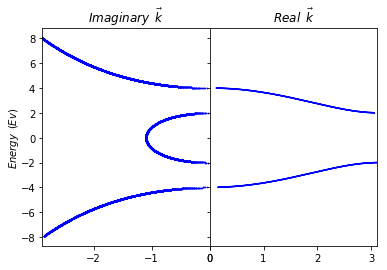

/anaconda3/lib/python3.6/site-packages/matplotlib/transforms.py:963: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 0] = interval


CombMolecule.mat


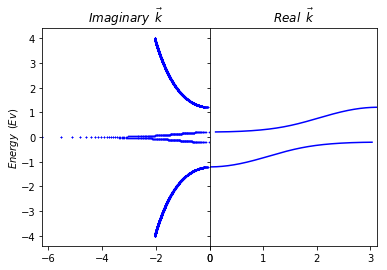

Meta.mat


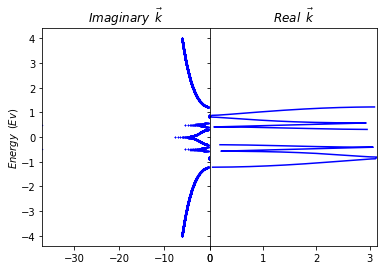

Ortho.mat


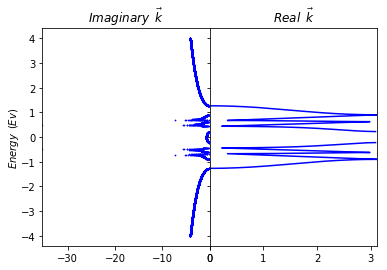

Para.mat


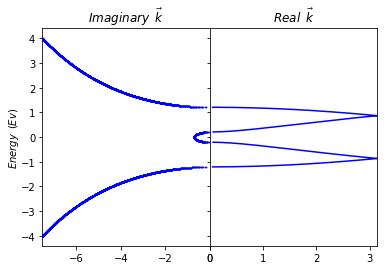

siloxane2.mat


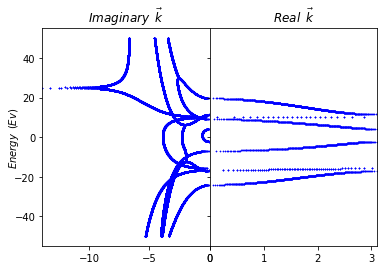

FileNotFoundError: [Errno 2] No such file or directory: 'silo_highrez.mat'

In [5]:
file_list = ['simple2bandex.mat', 'CombMolecule.mat', 'Meta.mat',
            'Ortho.mat', 'Para.mat', 'siloxane2.mat', 'silo_highrez.mat']
doplots(file_list)

## Siloxane is presenting challenges for how we would do this. Maybe the answer is to just run it in higher resolution? As for the imaginary side, I think the points look nicer and drawing lines brushes over specific things that we would like to cover with destructive quantum interference